In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

%matplotlib inline

In [2]:
ads_df = pd.read_csv('political_tv_ad_archive_CLEANED.csv')

In [3]:
ads_df.columns

Index(['id', 'wp_identifier', 'network', 'location', 'program', 'program_type',
       'start_time', 'end_time', 'archive_id', 'embed_url', 'sponsors',
       'sponsor_types', 'race', 'cycle', 'subjects', 'candidates', 'type',
       'message', 'date_created', 'cand_clinton', 'cand_trump', 'cand_summary',
       'sponsor_summary', 'clinton_sponsored', 'trump_sponsored',
       'ad_duration_sec', 'state', 'reference_count', 'air_count',
       'market_count', 'transcript', 'fact_checked', 'num_cand', 'cand_ln',
       'maj_party', 'winner_name', 'winner_party', 'winner_votes_pct',
       'result_change_summary'],
      dtype='object')

### Topic: How does the volume of political ads vary by state?

#### Total number of unique ads (by states)

In [6]:
num_ads=ads_df[['state','archive_id']]
num_ads = num_ads.groupby(['state'])['archive_id'].nunique().to_frame().reset_index().sort_values(by='archive_id',ascending=False)
num_ads.rename(columns={'archive_id':'count'}, inplace=True)
num_ads

,state,count
1,CA,650
4,IA,271
7,NH,252
6,NC,249
12,PA,225
3,FL,186
8,NV,184
11,OH,183
13,SC,137
2,CO,116


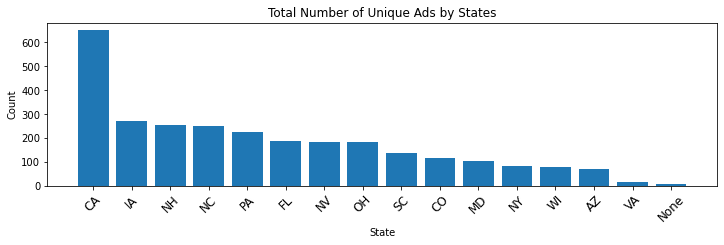

In [11]:
plt.figure(figsize=(12,3))
plt.bar(num_ads['state'],height=num_ads['count'])
plt.xlabel("State")
plt.ylabel("Count")
plt.xticks(size = 12,rotation=45)
plt.title("Total Number of Unique Ads by States")
plt.show()

#### Total volume of aired ads (by states)

In [12]:
vol_ads=ads_df[['state','air_count']]
vol_ads = ads_df.groupby(['state'])['air_count'].count().to_frame().reset_index().sort_values(by='air_count',ascending=False)
vol_ads.rename(columns={'air_count':'count'}, inplace=True)
vol_ads

,state,count
4,IA,52453
7,NH,27562
8,NV,23881
3,FL,22073
6,NC,19434
11,OH,16496
1,CA,16250
12,PA,15163
13,SC,10352
2,CO,8009


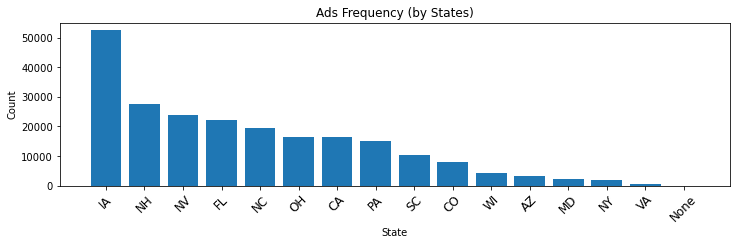

In [14]:
plt.figure(figsize=(12,3))
plt.bar(vol_ads['state'],height=vol_ads['count'])

plt.xlabel("State")
plt.ylabel("Count")
plt.xticks(size = 12,rotation=45)
plt.title("Ads Frequency (by States)")
plt.show()

#### Pre-election period: Ads Frequency over time (by state)

In [15]:
ads_df['start_time'] = pd.to_datetime(ads_df['start_time'])
ads_df['end_time'] = pd.to_datetime(ads_df['end_time'])

In [ ]:
# Get charts for the top three States (IA, NH, NV)

In [19]:
#Iowa
sample_ia=ads_df[ads_df['state']=='IA'][['start_time','air_count']]
sample_ia['start_time']=sample_ia['start_time'].dt.normalize()
sample_ia

,start_time,air_count
26,2016-09-08 00:00:00+00:00,1916
30,2016-09-05 00:00:00+00:00,1916
36,2016-09-06 00:00:00+00:00,1916
38,2016-09-06 00:00:00+00:00,1916
39,2016-09-07 00:00:00+00:00,1916
...,...,...
223659,2016-01-10 00:00:00+00:00,224
223663,2016-01-09 00:00:00+00:00,224
223664,2016-01-09 00:00:00+00:00,224
223667,2016-01-16 00:00:00+00:00,224


In [21]:
#get the ads frequency (number of times ads are aired on televisions) in Iowa
line_ia = sample_ia.groupby('start_time').count().reset_index()
line_ia.sort_values(by='air_count',ascending=False)

,start_time,air_count
75,2016-01-29 00:00:00+00:00,2099
78,2016-02-01 00:00:00+00:00,2066
74,2016-01-28 00:00:00+00:00,1952
73,2016-01-27 00:00:00+00:00,1865
72,2016-01-26 00:00:00+00:00,1693
...,...,...
87,2016-02-15 00:00:00+00:00,1
85,2016-02-11 00:00:00+00:00,1
80,2016-02-06 00:00:00+00:00,1
4,2015-10-25 00:00:00+00:00,1


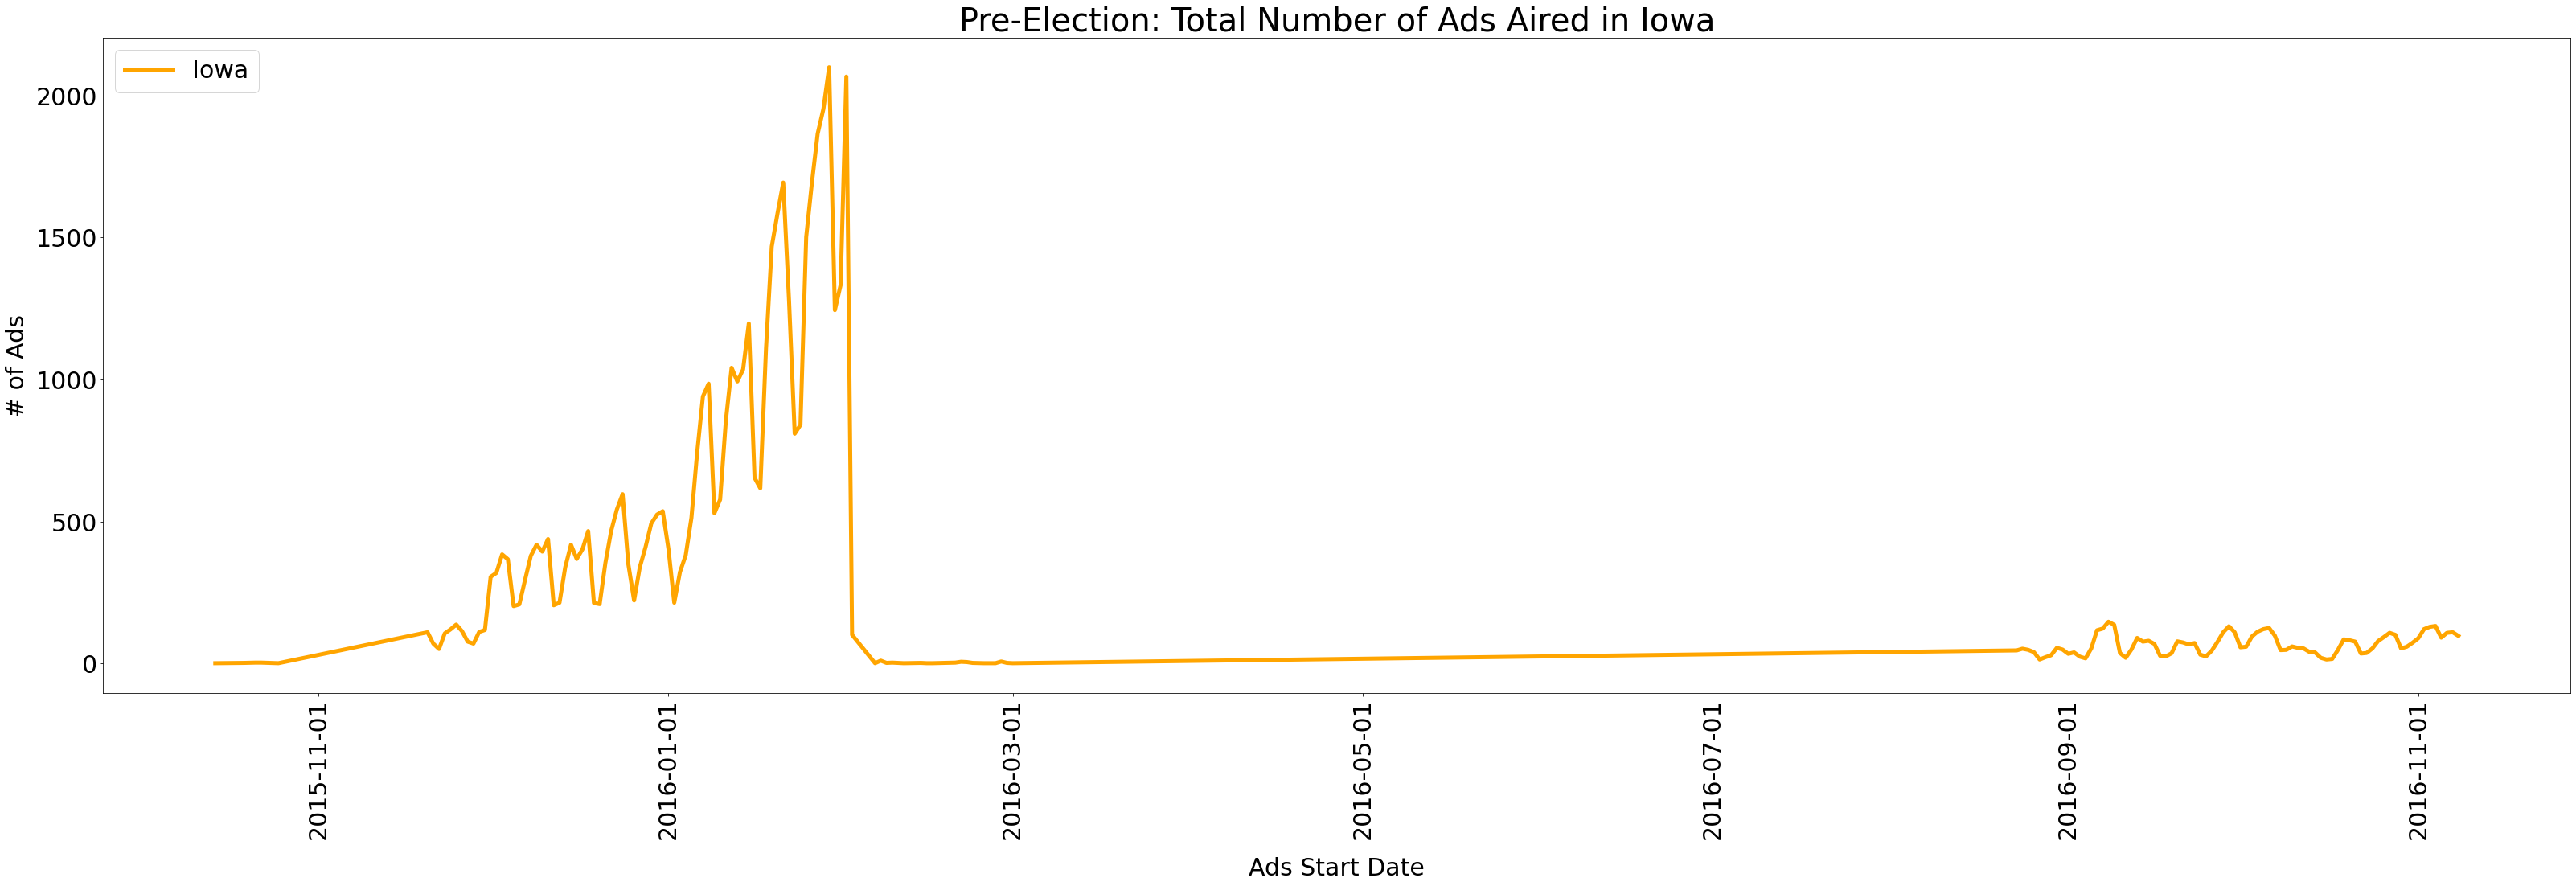

In [22]:
import matplotlib.dates as md

fig, ax = plt.subplots(figsize = (55,15))

plt.plot(line_ia['start_time'],line_ia['air_count'],label="Iowa",color='orange',linewidth=5)
plt.legend(loc = 'upper left',fontsize=30)
plt.xlabel('Ads Start Date', fontsize=30)
plt.ylabel('# of Ads', fontsize=30)
ax.xaxis.set_label_coords(0.5, -0.25)
ax.yaxis.set_label_coords(-0.03, 0.5)
plt.title('Pre-Election: Total Number of Ads Aired in Iowa', fontsize=40)
plt.xticks(size = 30,rotation=90)
plt.yticks(size = 30)
ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m-%d'))
plt.show()

In [23]:
#New Hampshire
sample_nh=ads_df[ads_df['state']=='NH'][['start_time','air_count']]
sample_nh['start_time']=sample_nh['start_time'].dt.normalize()
sample_nh

,start_time,air_count
1936,2016-09-08 00:00:00+00:00,57
1951,2016-09-08 00:00:00+00:00,57
1966,2016-07-29 00:00:00+00:00,12
1970,2016-07-29 00:00:00+00:00,12
1988,2016-09-08 00:00:00+00:00,53
...,...,...
223651,2016-01-16 00:00:00+00:00,224
223654,2016-01-09 00:00:00+00:00,224
223655,2016-01-09 00:00:00+00:00,224
223661,2016-01-09 00:00:00+00:00,224


In [24]:
# get the ads frequency (number of times ads are aired on televisions) in New Hampshire
line_nh = sample_nh.groupby('start_time').count().reset_index()
line_nh.sort_values(by='air_count',ascending=False)

,start_time,air_count
84,2016-02-08 00:00:00+00:00,604
80,2016-02-04 00:00:00+00:00,522
85,2016-02-09 00:00:00+00:00,513
73,2016-01-28 00:00:00+00:00,492
74,2016-01-29 00:00:00+00:00,477
...,...,...
104,2016-07-31 00:00:00+00:00,1
86,2016-02-12 00:00:00+00:00,1
88,2016-02-16 00:00:00+00:00,1
105,2016-08-05 00:00:00+00:00,1


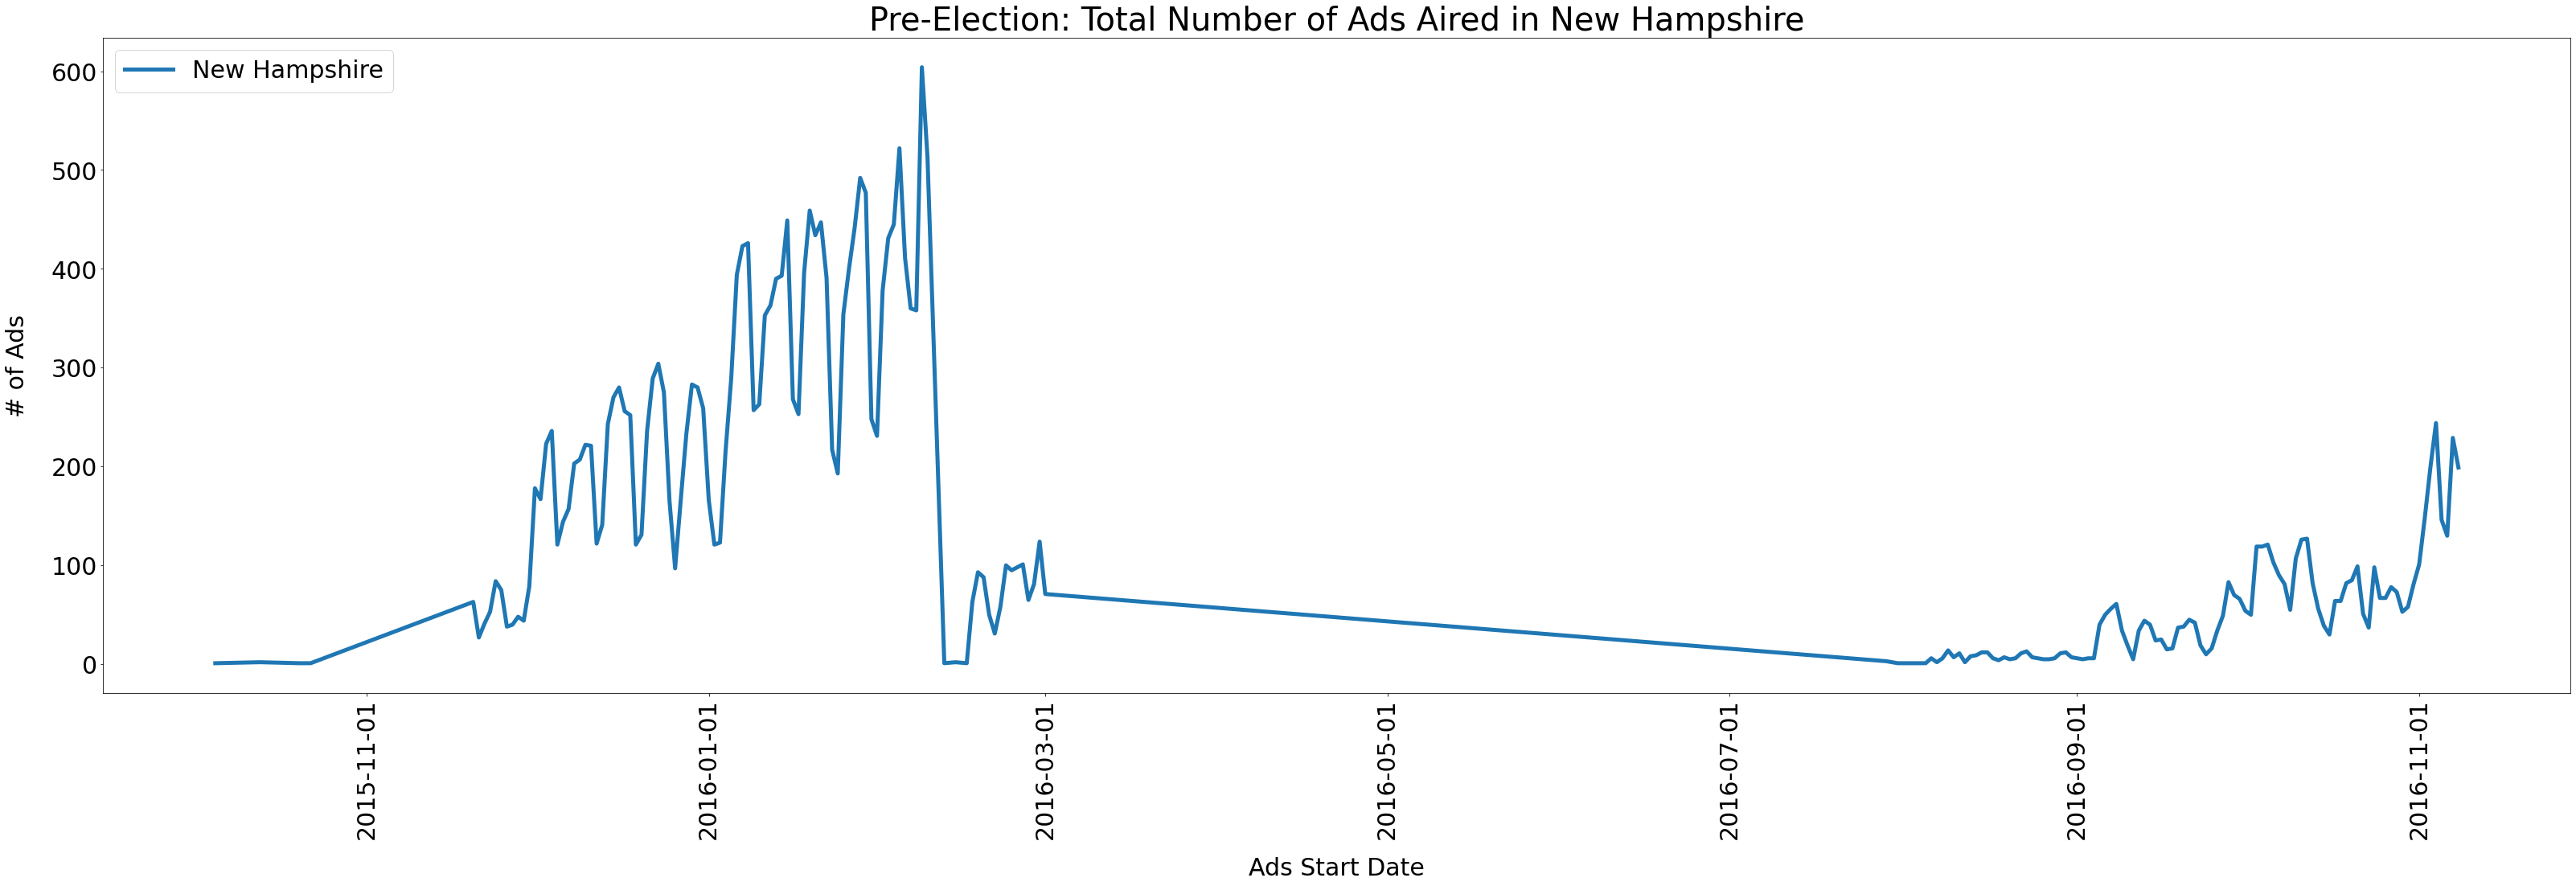

In [25]:
fig, ax = plt.subplots(figsize = (55,15))

plt.plot(line_nh['start_time'],line_nh['air_count'],label="New Hampshire",linewidth=5)
plt.legend(loc = 'upper left',fontsize=30)
plt.xlabel('Ads Start Date', fontsize=30)
plt.ylabel('# of Ads', fontsize=30)
ax.xaxis.set_label_coords(0.5, -0.25)
ax.yaxis.set_label_coords(-0.03, 0.5)
plt.title('Pre-Election: Total Number of Ads Aired in New Hampshire', fontsize=40)
plt.xticks(size = 30,rotation=90)
plt.yticks(size = 30)
ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m-%d'))
plt.show()

In [26]:
#Nevada
sample_nv=ads_df[ads_df['state']=='NV'][['start_time','air_count']]
sample_nv['start_time']=sample_nv['start_time'].dt.normalize()
sample_nv

,start_time,air_count
0,2016-09-09 00:00:00+00:00,1916
2,2016-09-04 00:00:00+00:00,1916
4,2016-09-06 00:00:00+00:00,1916
21,2016-09-05 00:00:00+00:00,1916
24,2016-09-09 00:00:00+00:00,1916
...,...,...
223642,2016-01-10 00:00:00+00:00,224
223653,2016-01-09 00:00:00+00:00,224
223656,2016-01-10 00:00:00+00:00,224
223657,2016-01-10 00:00:00+00:00,224


In [27]:
# get the ads frequency (number of times ads are aired on televisions) in Nevada
line_nv = sample_nv.groupby('start_time').count().reset_index()
line_nv.sort_values(by='air_count',ascending=False)

,start_time,air_count
55,2016-02-19 00:00:00+00:00,1073
54,2016-02-18 00:00:00+00:00,950
56,2016-02-20 00:00:00+00:00,635
53,2016-02-17 00:00:00+00:00,625
48,2016-02-12 00:00:00+00:00,549
...,...,...
6,2015-12-28 00:00:00+00:00,1
10,2016-01-05 00:00:00+00:00,1
63,2016-03-01 00:00:00+00:00,1
64,2016-08-04 00:00:00+00:00,1


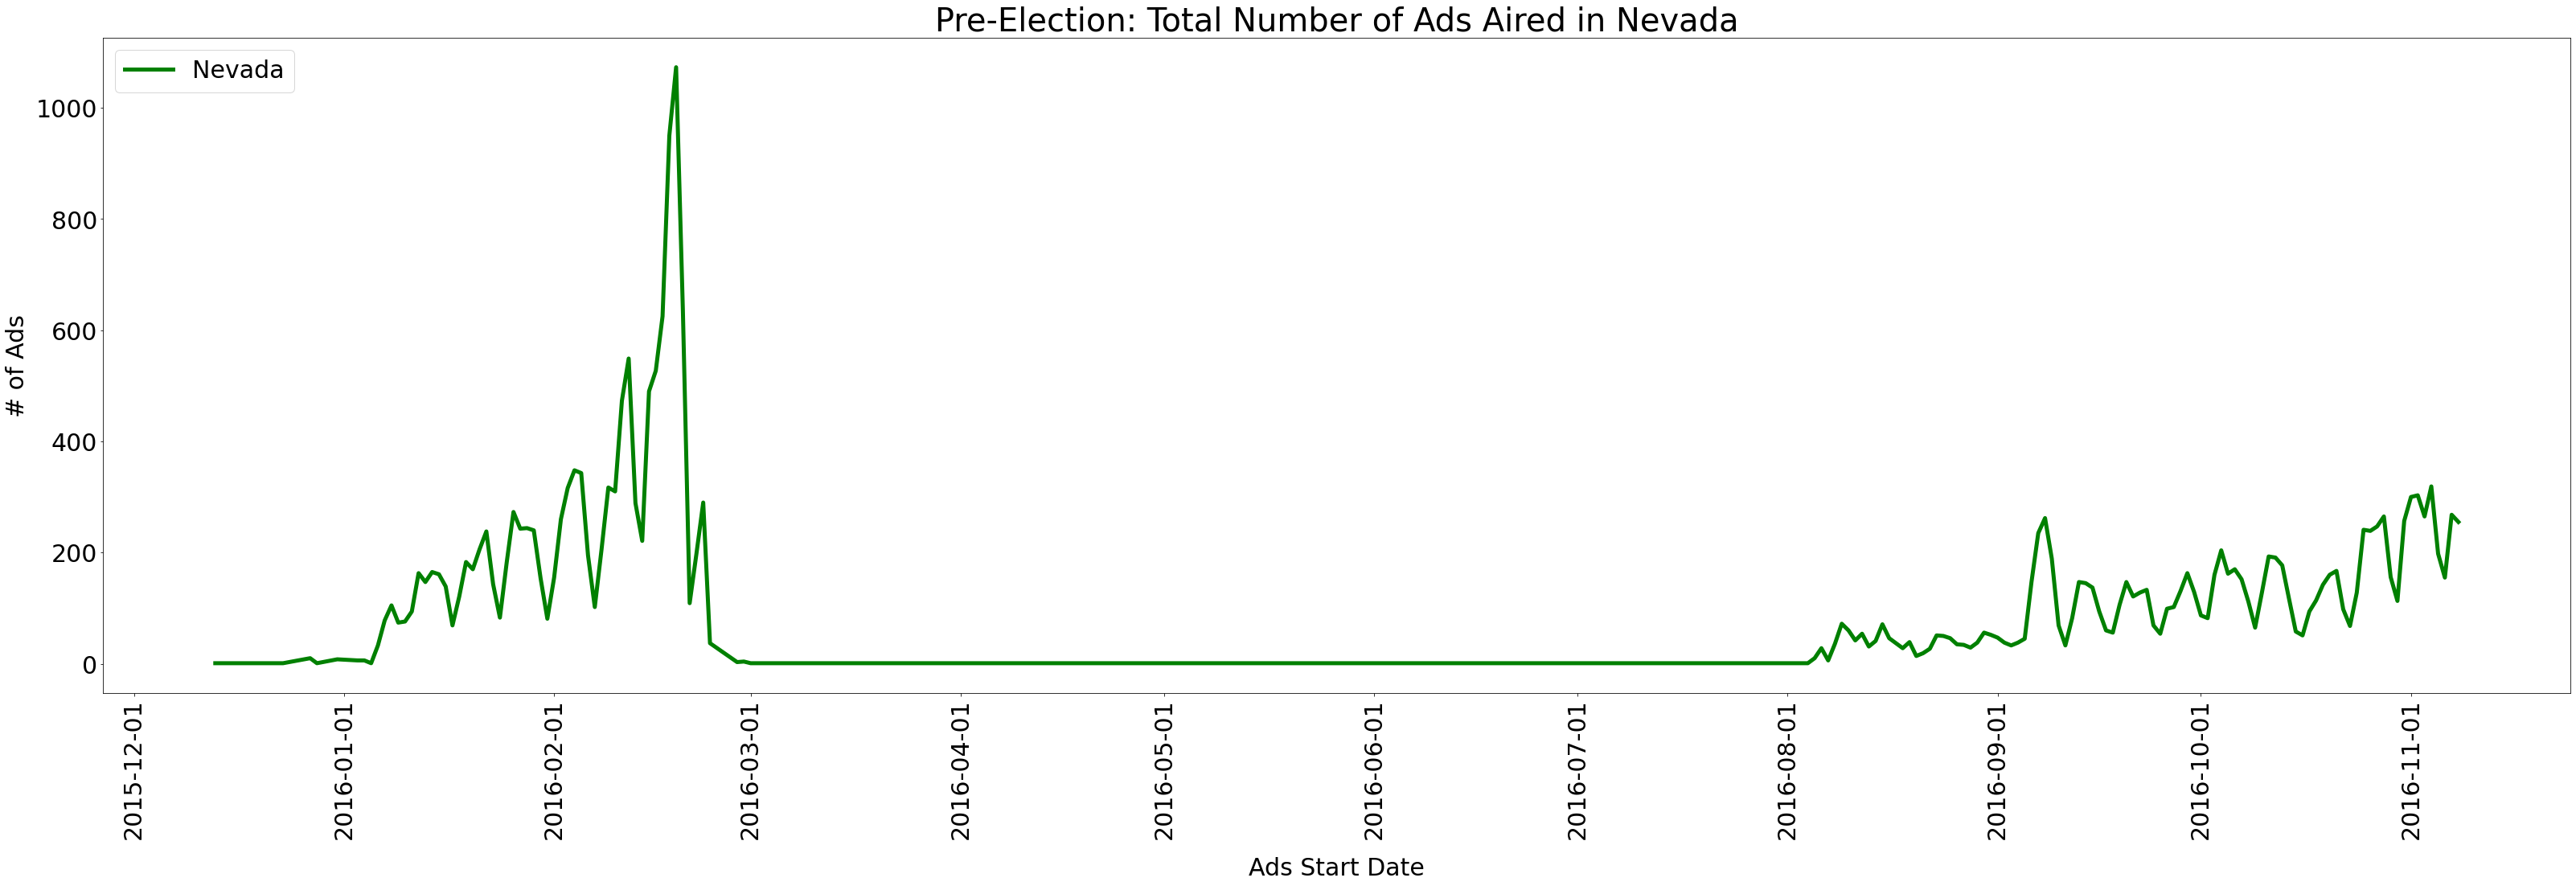

In [28]:
fig, ax = plt.subplots(figsize = (55,15))

plt.plot(line_nv['start_time'],line_nv['air_count'],label="Nevada",color='green',linewidth=5)
plt.legend(loc = 'upper left',fontsize=30)
plt.xlabel('Ads Start Date', fontsize=30)
plt.ylabel('# of Ads', fontsize=30)
ax.xaxis.set_label_coords(0.5, -0.25)
ax.yaxis.set_label_coords(-0.03, 0.5)
plt.title('Pre-Election: Total Number of Ads Aired in Nevada', fontsize=40)
plt.xticks(size = 30,rotation=90)
plt.yticks(size = 30)
ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m-%d'))
plt.show()

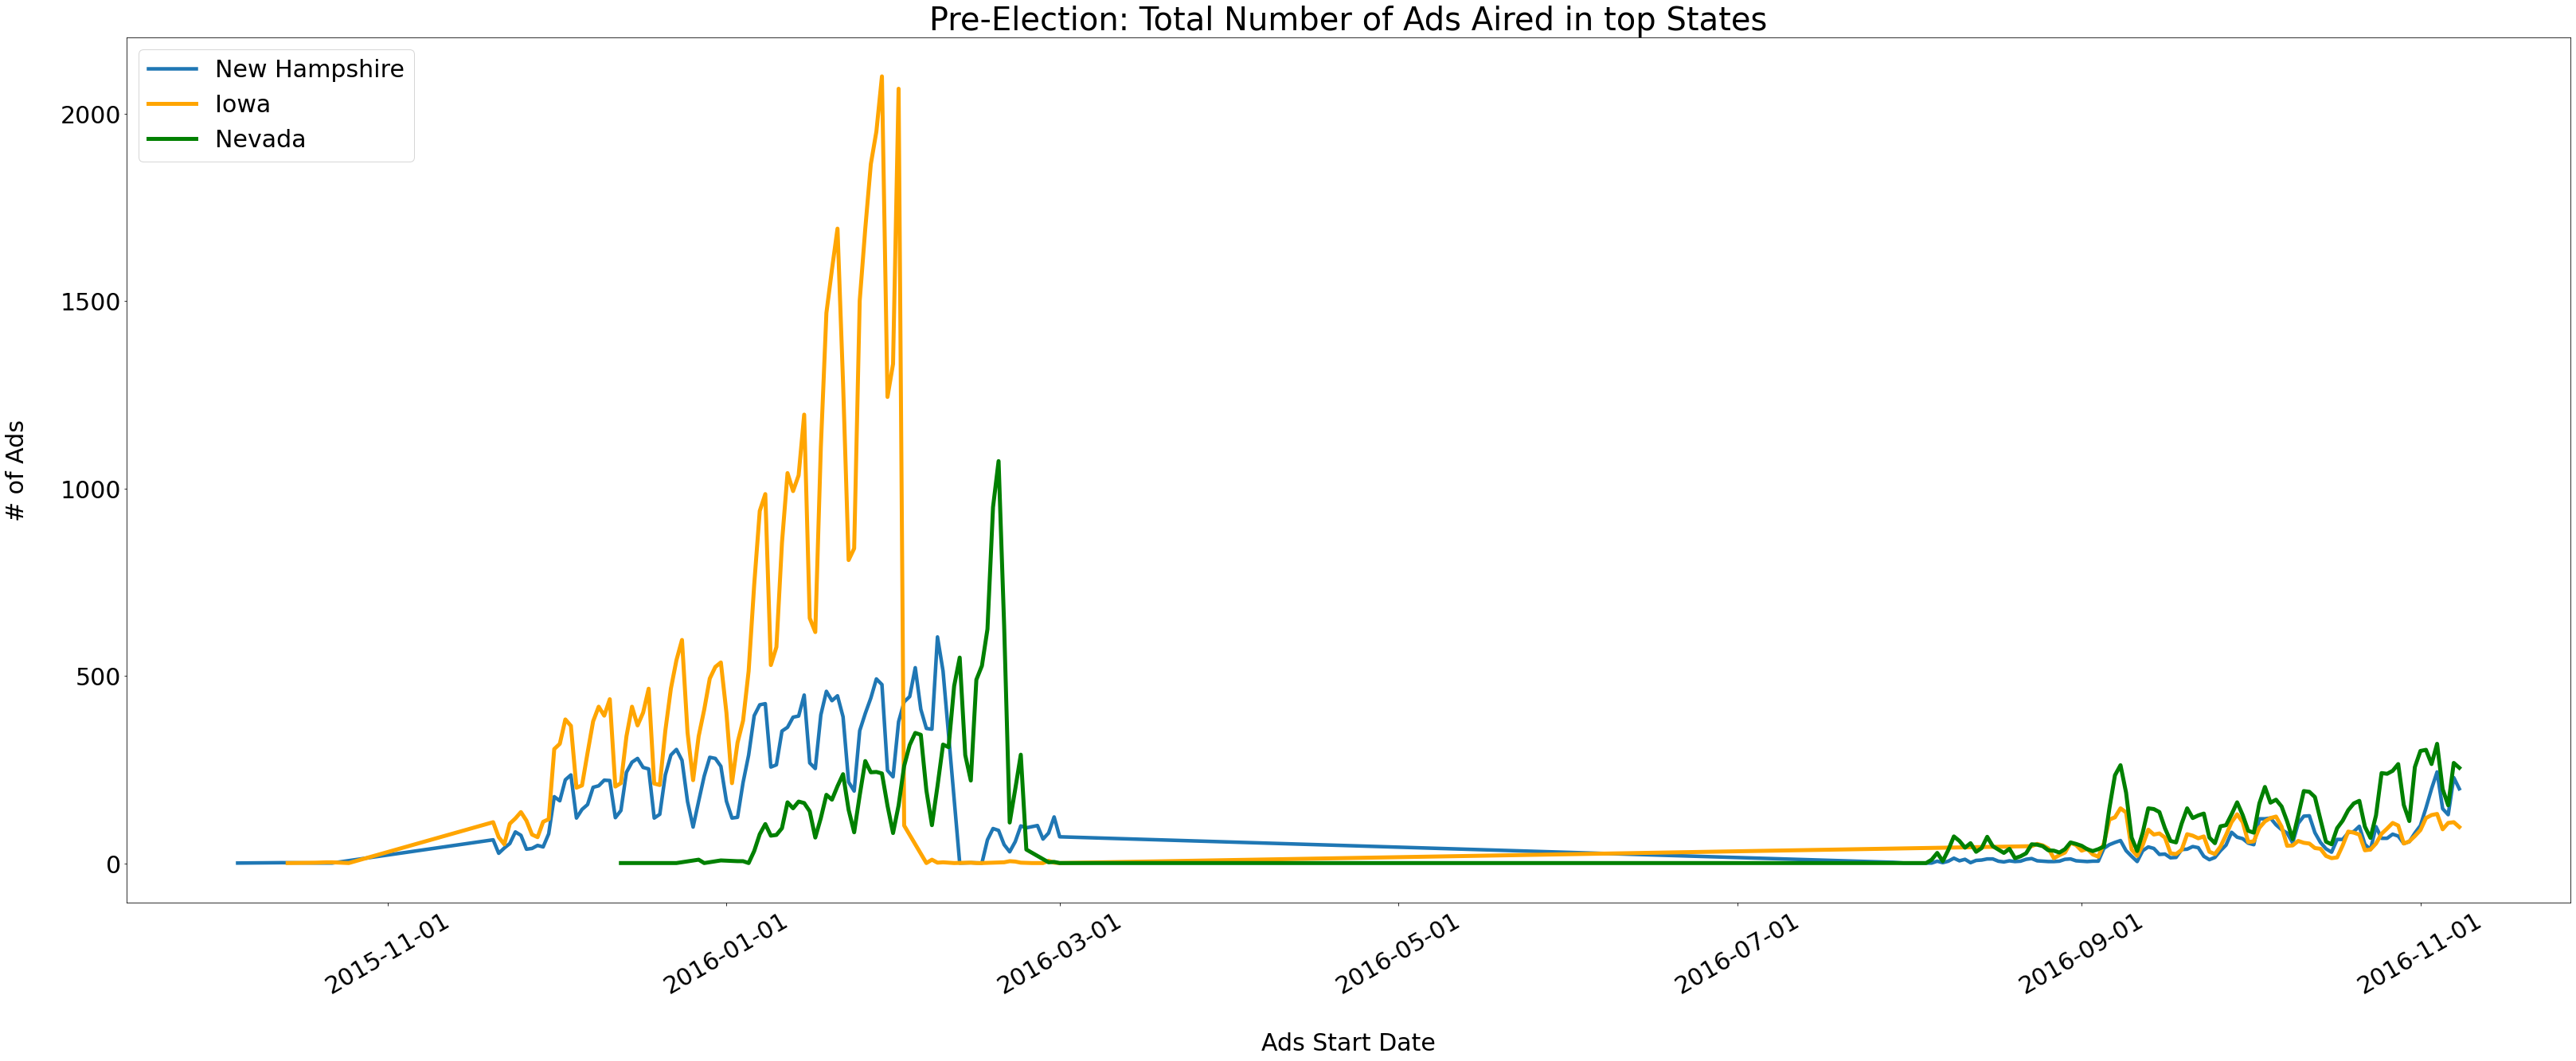

In [30]:
#combine three graphs
fig, ax = plt.subplots(figsize = (55,20))

plt.plot(line_nh['start_time'],line_nh['air_count'],label="New Hampshire",linewidth=4.5)
plt.plot(line_ia['start_time'],line_ia['air_count'],label="Iowa",color='orange',linewidth=5)
plt.plot(line_nv['start_time'],line_nv['air_count'],label="Nevada",color='green',linewidth=5)
plt.legend(loc = 'upper left',fontsize=30)
plt.xlabel('Ads Start Date', fontsize=30)
plt.ylabel('# of Ads', fontsize=30)
ax.xaxis.set_label_coords(0.5, -0.15)
ax.yaxis.set_label_coords(-0.04, 0.5)
plt.title('Pre-Election: Total Number of Ads Aired in top States', fontsize=40)
plt.xticks(size = 30,rotation=30)
plt.yticks(size = 30)
ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m-%d'))

#### What’s the effectiveness of an ad on different programs? 
Advertising on news vs. non-news programs

In [31]:
ads_df['program_type'].value_counts(dropna=False)

news        143215
not news     80454
Name: program_type, dtype: int64

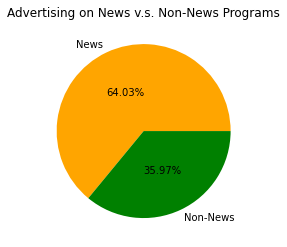

In [32]:
plt.pie([143215, 80454], 
        colors=['orange', 'green'],
        labels=['News', 'Non-News'],
        autopct='%1.2f%%',
        pctdistance=0.5)

plt.title('Advertising on News v.s. Non-News Programs')
plt.show()

In [33]:
# get the top 10 news programs that most ads are aired on
news_top10=ads_df[ads_df['program_type']=='news']['program'].value_counts(dropna=False).head(10)
news_top10.to_frame().reset_index()

,index,program
0,Today,8886
1,CBS This Morning,5294
2,Good Morning America,4920
3,Jimmy Kimmel Live,2178
4,The Late Show With Stephen Colbert,2160
5,The Tonight Show Starring Jimmy Fallon,2099
6,ET Entertainment Tonight,1873
7,FOX 25 Morning News,1529
8,FOX5 News This Morning,1346
9,News 9 Daybreak,1262


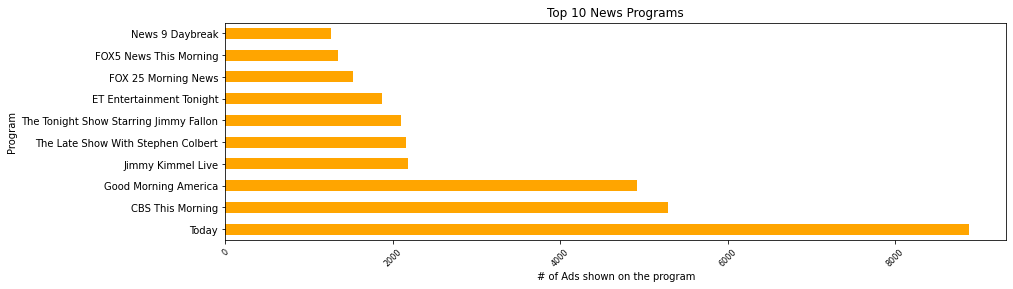

In [34]:
# plot the result into a horizontal bar chart
news_top10.plot(x='program',y='index',kind="barh",figsize=(14,4),color='orange')
plt.xlabel("# of Ads shown on the program")
plt.ylabel("Program")
plt.xticks(size = 8,rotation=45)
plt.title("Top 10 News Programs")
plt.show()

In [35]:
# get the top 10 non-news programs that most ads are aired on
nonnews_top10=ads_df[ads_df['program_type']=='not news']['program'].value_counts(dropna=False).head(10)
nonnews_top10.to_frame().reset_index()

,index,program
0,Judge Judy,2933
1,Jeopardy,2803
2,Wheel of Fortune,2625
3,The Ellen De Generes Show,2396
4,Family Feud,2250
5,Inside Edition,2154
6,Dr. Phil,2118
7,Live With Kelly and Michael,2055
8,The Big Bang Theory,1822
9,Steve Harvey,1644


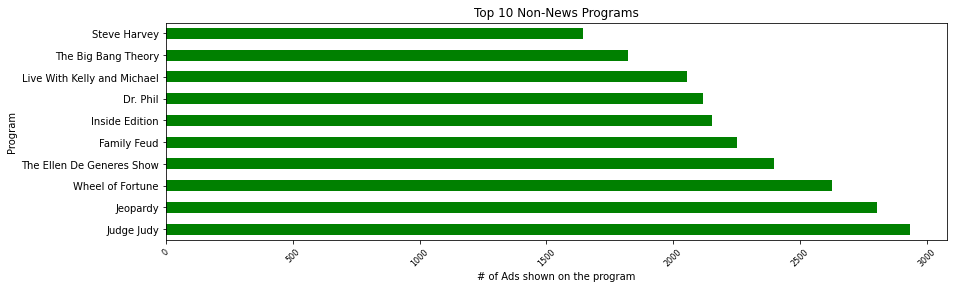

In [38]:
nonnews_top10.plot(x='index',y='program',kind="barh",figsize=(14,4),color='green')
plt.xlabel("# of Ads shown on the program")
plt.ylabel("Program")
plt.xticks(size = 8,rotation=45)
plt.title("Top 10 Non-News Programs")
plt.show()